### Reproducing Results of DeepChem models on BBBP dataset

In this notebook, I will reproduce the results on blood brain barrier prediction dataset, which are part of MoleculeNet benchmarks. The dataset was downloaded from [MoleculeNet](http://moleculenet.ai/datasets-1).

In [38]:
from __future__ import print_function
import os
import sys
import time

import numpy as np
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, Image
print(time.asctime())

np.random.seed(123)

Tue Jan 23 17:40:48 2018


We will start by loading the dataset and taking a quick look at it. We can use commands in  the BACE dataset [jupyter notebook](https://github.com/deepchem/deepchem/blob/master/examples/notebooks/BACE.ipynb) in deepchem examples.

In [39]:
bbbp_dataset = dc.utils.save.load_from_disk("../data/BBBP.csv")
print("Shape of the Dataset: ", bbbp_dataset.shape)
print(bbbp_dataset.head)

Shape of the Dataset:  (2050, 4)
<bound method DataFrame.head of        num                               name  p_np  \
0        1                         Propanolol     1   
1        2               Terbutylchlorambucil     1   
2        3                              40730     1   
3        4                                 24     1   
4        5                        cloxacillin     1   
5        6                       cefoperazone     1   
6        7                   rolitetracycline     1   
7        8                        ondansetron     1   
8        9                          diltiazem     1   
9       10                          Amiloride     1   
10      11                         M2L-663581     0   
11      12                          alovudine     1   
12      13                                 18     1   
13      14                              24959     1   
14      15                          methadone     1   
15      16                         alfentanil     1   


There are 2050 examples in the dataset and the most useful columns are `smiles` and `p_np`, which are used for the smiles representation and category label for each molecule. It is also helpful to take a look at the actual chemical structures that are encoded by these strings. We will use `rdkit` for this purpose. 

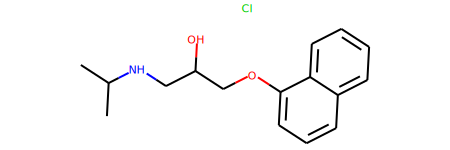

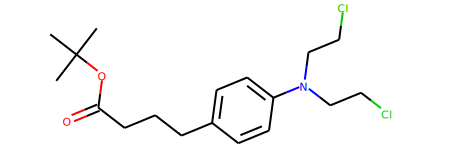

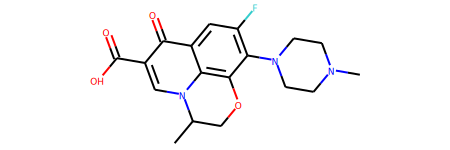

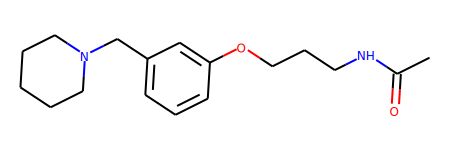

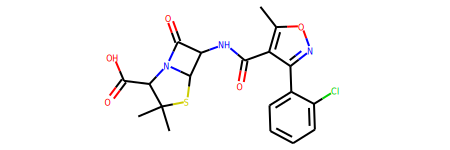

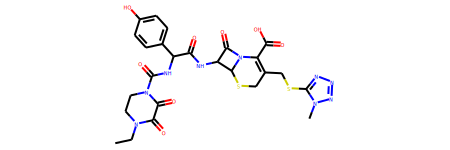

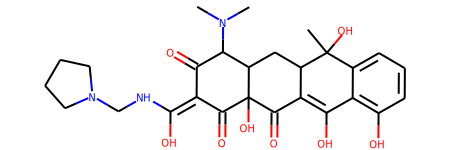

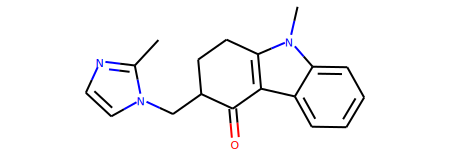

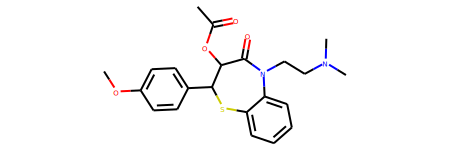

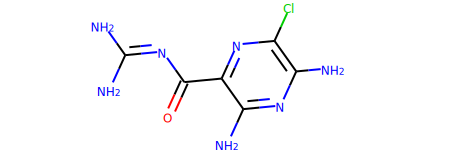

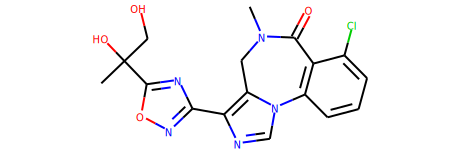

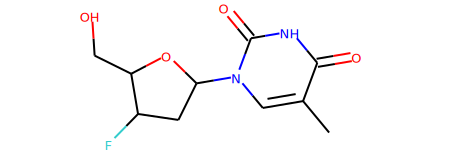

In [54]:
def moltosvg(mol,molSize=(450,150),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return svg.replace('svg:','')

molSize=(450,150)
num_to_display = 12
svgs = []
for i in range(num_to_display):
    sm = bbbp_dataset.smiles[i]
    mol = Chem.MolFromSmiles(sm)
    s = moltosvg(mol)
    svgs.append(s)
    display(SVG(s))

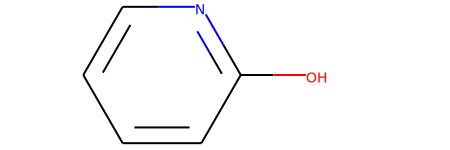

In [52]:
m = Chem.MolFromSmiles('c1cccnc1O')
SVG(moltosvg(m))